In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

from IPython.display import HTML
style = "<style>svg{width:10% !important;height:10% !important;</style>"
HTML( style )

import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz2.38"
from sklearn.tree import plot_tree

In [3]:
titanic_data = pd.read_csv('train.csv')

In [4]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверим наличие пропущенных значений

In [5]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
y = titanic_data.Survived

Закодируем строковые переменные

In [8]:
X = pd.get_dummies(X)

In [9]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


Заполним пропущенные значения возраста медианным возрастом:

In [10]:
X = X.fillna({'Age' : X.Age.median()})

In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

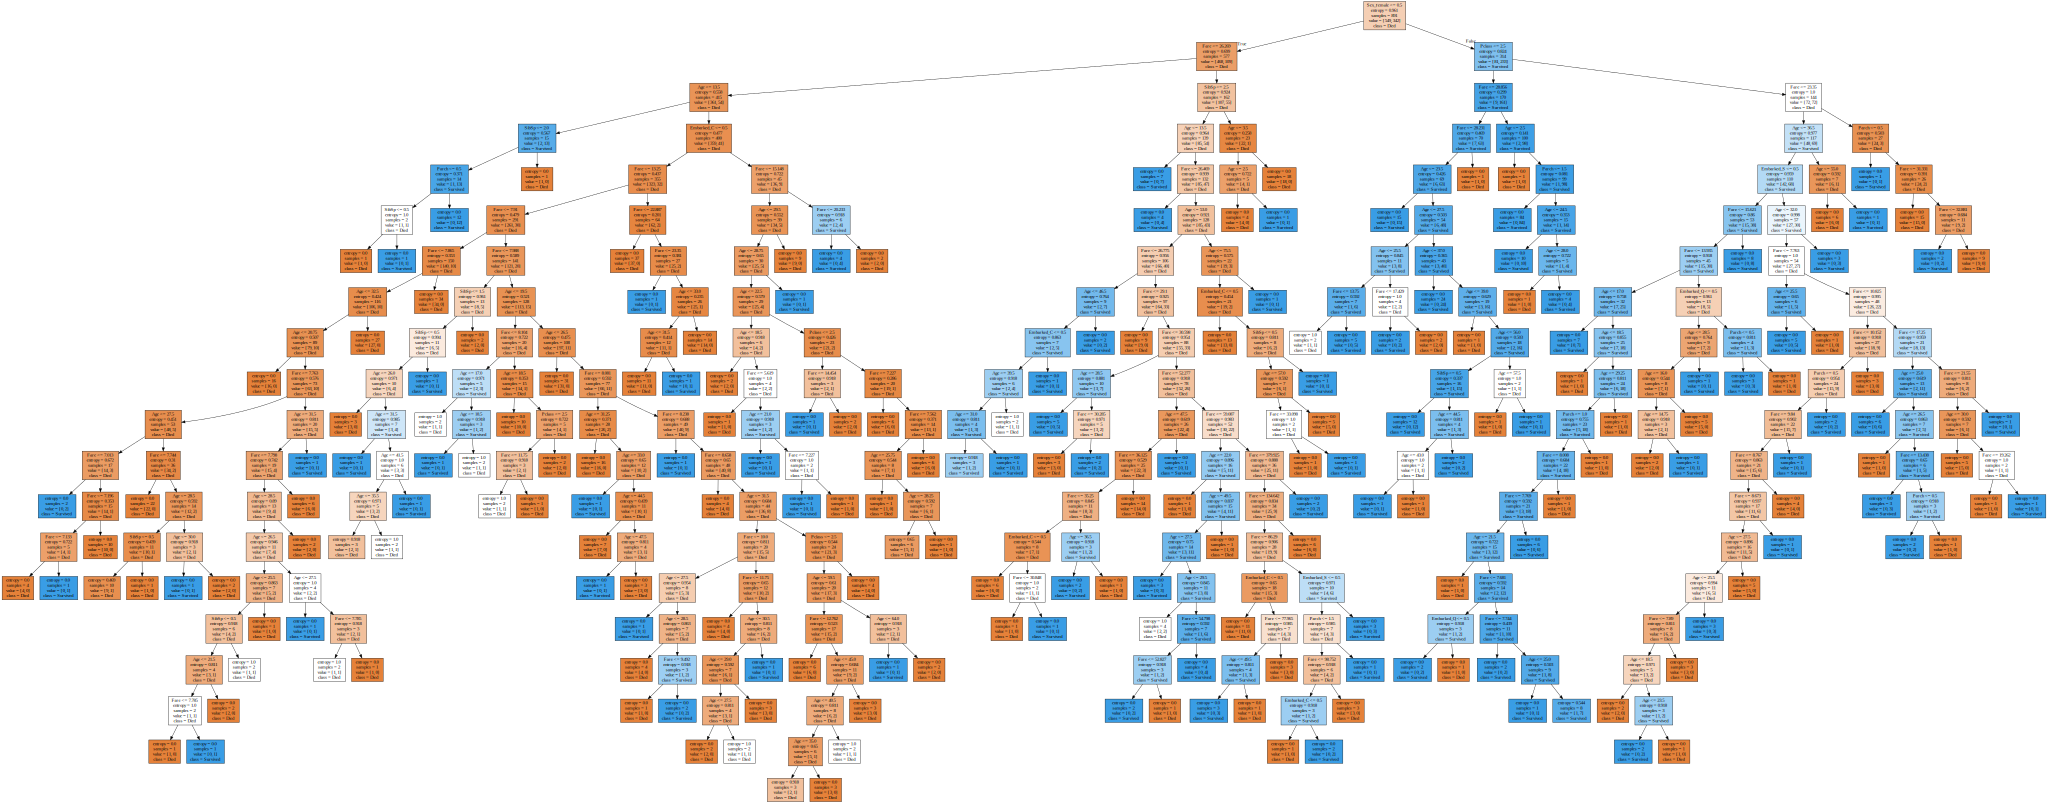

In [13]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

Ограничим глубину дерева

In [14]:
from sklearn.model_selection import train_test_split

Тестовое множество - 33% наблюдений, train множество - оставшаяся часть

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [16]:
X_train.shape

(596, 10)

In [17]:
X_test.shape

(295, 10)

In [18]:
clf.score(X, y) #число правильных ответов

0.9797979797979798

In [19]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.score(X_train, y_train)

0.9798657718120806

In [21]:
clf.score(X_test, y_test)

0.7728813559322034

Ограничим глубину дерева

In [22]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 3)

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [24]:
clf.score(X_train, y_train)

0.8238255033557047

In [25]:
clf.score(X_test, y_test)

0.8203389830508474

In [26]:
max_depth_values = range(1, 100)

In [27]:
scores_data = pd.DataFrame()

In [28]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 'train_score':[train_score], 'test_score':[test_score]})
    scores_data = scores_data.append(temp_score_data)

In [29]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [30]:
 scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', "test_score"], 
                            var_name='set_type', value_name='score')

In [31]:
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
193,95,test_score,0.769492
194,96,test_score,0.762712
195,97,test_score,0.769492
196,98,test_score,0.772881


Зависимость точности от глубины дерева:

<AxesSubplot:xlabel='max_depth', ylabel='score'>

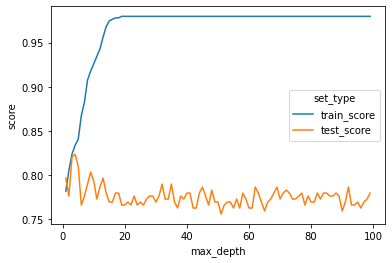

In [32]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

Применим кросс-валидацию.

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 4)

In [36]:
cross_val_score(clf, X_train, y_train, cv=5) #разбиваем данные из x_train на 5 частей и тестим их

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [37]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

(очистим scores_data)

In [47]:
scores_data = pd.DataFrame()

In [48]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = max_depth)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    temp_score_data = pd.DataFrame({'max_depth' : [max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [49]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.793669


In [50]:
 scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], 
                            var_name='set_type', value_name='score')

In [51]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.793669
203,6,cross_val_score,0.803754
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.793641
206,9,cross_val_score,0.807073
207,10,cross_val_score,0.802031


<AxesSubplot:xlabel='max_depth', ylabel='score'>

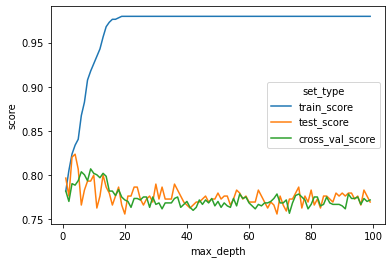

In [52]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [53]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 10)

In [54]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

GridSearchCV подбирает нам максимально эффективный набор параметров

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
clf = tree.DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Заводим сюда те параметры, которые есть у нашего классификатора clf

In [57]:
parametrs = {'criterion' : ['gini', 'entropy'], 'max_depth' : range(1, 30) }

In [58]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv = 5) #первый аргумент - классификатор, второй - словарь с параметрами
#cv - характеристика кросс валидаци

In [59]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

Ищем лучшие параметры:

In [60]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [61]:
best_clf = grid_search_cv_clf.best_estimator_

In [63]:
best_clf #дерево с лучшими эстимейторами

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [64]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [65]:
best_clf.score(X_test, y_test) #проверяем точность классификации

0.7694915254237288

Рассчитаем разные метрики

In [66]:
from sklearn.metrics import precision_score, recall_score

In [67]:
y_pred = best_clf.predict(X_test)

In [68]:
precision_score(y_test, y_pred)

0.8023255813953488

In [69]:
recall_score(y_test, y_pred)

0.575

In [70]:
y_predicted_prob = best_clf.predict_proba(X_test) #вероятность отнесения пассажира к выжившему

<AxesSubplot:>

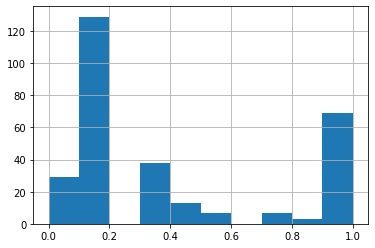

In [71]:
pd.Series(y_predicted_prob[:, 1]).hist()

Перекодируем данные - если вероятность больше 0,8, то относим к положительному классу

In [72]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [73]:
precision_score(y_test, y_pred)

0.8840579710144928

In [74]:
recall_score(y_test, y_pred)

0.5083333333333333

In [75]:
pd.Series(y_predicted_prob[:, 1]).unique()

array([0.11481481, 1.        , 0.34375   , 0.        , 0.76190476,
       0.875     , 0.39285714, 0.4       , 0.6       , 0.92307692,
       0.41176471])

### Roc - кривая

True Positive Rate - сколько из предсказанных нами выживших пассажиров реально выжило. False Positive Rate - для какого проента пассажиров с отрицательным классом мы дали неправильный ответ

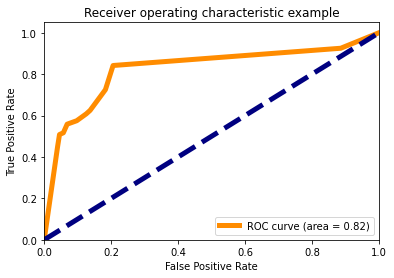

In [76]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
lw = 5
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Мы можем определить минимальное число наблюдений, после которого можно делать разбиение (min_samples_split). И минимальное число наблюдений в листе (min_samples_leaf)

In [77]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_split=100, min_samples_leaf = 10)

In [78]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=100)

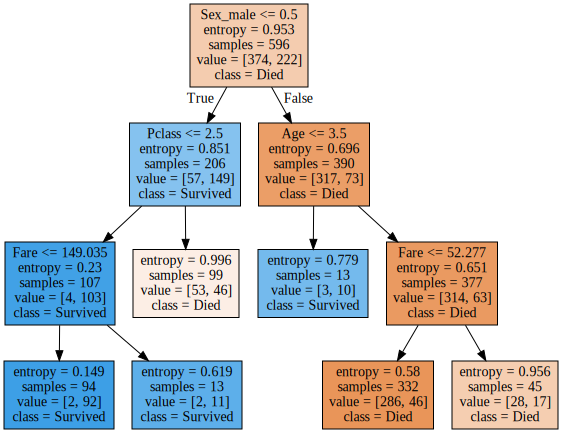

In [79]:
graph = Source(tree.export_graphviz(clf, out_file=None, feature_names=list(X),class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

# Random forest

**Идея:**

Вместо одного большого дерева решений мы создаем рандомное число маленьких деревьев, в которых будут разные поднаборы колонок и строк (комбинации фичей или комбинации строк могут повторяться). 

У каждого дерева есть свои параметры, которые мы знаем. Но теперь у нас есть новый параметр нашей модели - число деревьев (метапараметр). У всех этих деревьев будем варьировать только один параметр (глубина, например). Также мы задаем процент исходного набора фичей (например, брать по 30% фичей из исходного набора). Каждое дерево дает предсказания, они усредняются, и мы получаем общий результат - среднее арифметическое вероятностей. 

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [81]:
clf_rf = RandomForestClassifier()

In [82]:
parametrs = {'n_estimators':[10, 20, 30], 'max_depth':[2, 5, 7, 10]}

*n_estimators - кол-во деревьев*

In [83]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [84]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [85]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 20}

#### Мы можем достать из деревьев информацию о том, какие параметры наиболее важны при обучении (по Information Gain).

In [86]:
best_clf = grid_search_cv_clf.best_estimator_

In [87]:
best_clf.score(X_test, y_test)

0.7762711864406779

In [88]:
feature_importances = best_clf.feature_importances_

In [89]:
feature_importances_df = pd.DataFrame({'features':list(X_train),
                                       'feature_importances':feature_importances})

In [90]:
feature_importances_df

,features,feature_importances
0,Pclass,0.128610
1,Age,0.157179
2,SibSp,0.054946
3,Parch,0.035953
4,Fare,0.182150
5,Sex_female,0.168882
6,Sex_male,0.207320
7,Embarked_C,0.035995
8,Embarked_Q,0.012187
9,Embarked_S,0.016777


In [91]:
feature_importances_df.sort_values('feature_importances', ascending = False)

,features,feature_importances
6,Sex_male,0.207320
4,Fare,0.182150
5,Sex_female,0.168882
1,Age,0.157179
0,Pclass,0.128610
2,SibSp,0.054946
7,Embarked_C,0.035995
3,Parch,0.035953
9,Embarked_S,0.016777
8,Embarked_Q,0.012187


#### Важное замечание состоит в том, что при одинаковых показателях IG для сплитов по разным фичам, выбор более важой вичи происходит случайно. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.